# Import Important Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import librosa 
import matplotlib.pyplot as plt
import seaborn as sns


from glob import glob

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [3]:
ravdess = "./cats_dogs"
ravdess_directory_list = os.listdir(ravdess)

print(ravdess_directory_list)

['cat_74.wav', 'dog_barking_63.wav', 'cat_60.wav', 'dog_barking_77.wav', 'cat_48.wav', 'dog_barking_88.wav', 'cat_126.wav', 'cat_132.wav', 'cat_133.wav', 'cat_127.wav', 'dog_barking_89.wav', 'cat_49.wav', 'dog_barking_76.wav', 'cat_61.wav', 'dog_barking_62.wav', 'cat_75.wav', 'cat_9.wav', 'cat_63.wav', 'dog_barking_74.wav', 'cat_77.wav', 'dog_barking_60.wav', 'dog_barking_48.wav', 'cat_88.wav', 'cat_131.wav', 'cat_125.wav', 'cat_119.wav', 'cat_118.wav', 'cat_124.wav', 'cat_130.wav', 'cat_89.wav', 'dog_barking_49.wav', 'dog_barking_61.wav', 'cat_76.wav', 'dog_barking_75.wav', 'cat_62.wav', 'cat_8.wav', 'dog_barking_59.wav', 'cat_66.wav', 'dog_barking_71.wav', 'cat_72.wav', 'dog_barking_65.wav', 'cat_99.wav', '.DS_Store', 'dog_barking_108.wav', 'cat_108.wav', 'cat_134.wav', 'cat_120.wav', 'cat_121.wav', 'cat_135.wav', 'cat_109.wav', 'dog_barking_109.wav', 'cat_98.wav', 'dog_barking_64.wav', 'cat_73.wav', 'dog_barking_70.wav', 'cat_67.wav', 'dog_barking_58.wav', 'cat_59.wav', 'cat_71.wav'

In [4]:

# Prepare lists to hold labels (cat/dog) and file paths
labels = []
paths = []

# Process each audio file in the ravdess directory
for audio_file in os.listdir(ravdess):
    # Determine the label based on the filename
    if audio_file.startswith('dog'):
        labels.append('dog')
    elif audio_file.startswith('cat'):
        labels.append('cat')

    else :
        labels.append("unknown")

    # Append the file path to the paths list
    paths.append(os.path.join(ravdess, audio_file))

unknown_index = labels.index("unknown")   
unknown_path = paths[unknown_index]
print(unknown_index)


print(f"The path of the unknown sound is: {unknown_path}")

labels.pop(42)
paths.pop(42)
# Create a DataFrame from the lists
data_df = pd.DataFrame({
    'label': labels,
    'path': paths
})

# Display the first few and last few rows of the DataFrame together
head_and_tail = pd.concat([data_df.head(), data_df.tail()])
print("First and last few rows of the DataFrame:")
print(head_and_tail)

# Display a summary of the DataFrame
print("\nSummary of the DataFrame:")
print(data_df.describe(include='all'))

# Display the count of each label

# Get the path corresponding to "unknown"

label_counts = data_df['label'].value_counts()
print("\nCount of each label:")
print(label_counts)


42
The path of the unknown sound is: ./cats_dogs/.DS_Store
First and last few rows of the DataFrame:
    label                            path
0     cat          ./cats_dogs/cat_74.wav
1     dog  ./cats_dogs/dog_barking_63.wav
2     cat          ./cats_dogs/cat_60.wav
3     dog  ./cats_dogs/dog_barking_77.wav
4     cat          ./cats_dogs/cat_48.wav
272   cat          ./cats_dogs/cat_45.wav
273   dog  ./cats_dogs/dog_barking_46.wav
274   cat          ./cats_dogs/cat_51.wav
275   cat          ./cats_dogs/cat_79.wav
276   cat           ./cats_dogs/cat_7.wav

Summary of the DataFrame:
       label                    path
count    277                     277
unique     2                     277
top      cat  ./cats_dogs/cat_74.wav
freq     164                       1

Count of each label:
label
cat    164
dog    113
Name: count, dtype: int64


In [5]:
data_df.to_csv("data_path.csv",index=False)

In [6]:
print(data_df.label.value_counts())

label
cat    164
dog    113
Name: count, dtype: int64


# Data Visualization

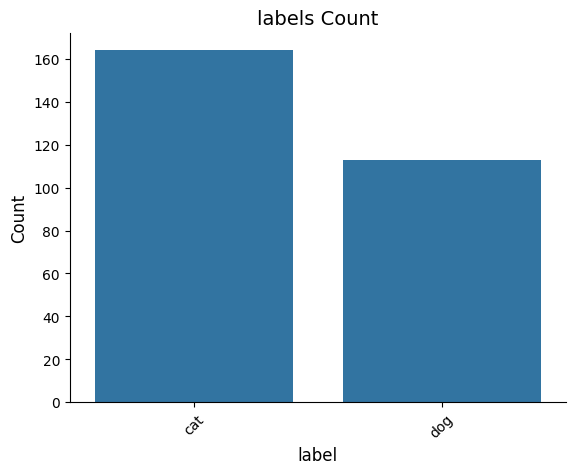

In [7]:
plt.title('labels Count', size = 14)
filtered_final_df = data_df

sns.countplot(data = filtered_final_df , x = 'label')
plt.xlabel('label',size = 12)
plt.ylabel('Count' , size = 12)

# enhancing visualisation
sns.despine(top = True , right = True , bottom = False , left = False)
plt.xticks(rotation = 45)

plt.show()

In [8]:

def waveplot_creation(data, sr, label):
    plt.figure(figsize=(10, 4))
    plt.title(f"{label} Waveplot")
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectrogram_creation(data, sr, label):
    plt.figure(figsize=(12, 3))
    plt.title(f"{label} Spectrogram")
    S = librosa.stft(data)  # Short-time Fourier transform
    Sdb = librosa.amplitude_to_db(S)
    librosa.display.specshow(Sdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

def melspectrogram_creation(data, sr, label):
    plt.figure(figsize=(12, 3))
    plt.title(f"{label} Mel Spectrogram")
    MS = librosa.feature.melspectrogram(y=data, sr=sr)
    MSdb = librosa.power_to_db(MS)
    librosa.display.specshow(MSdb, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

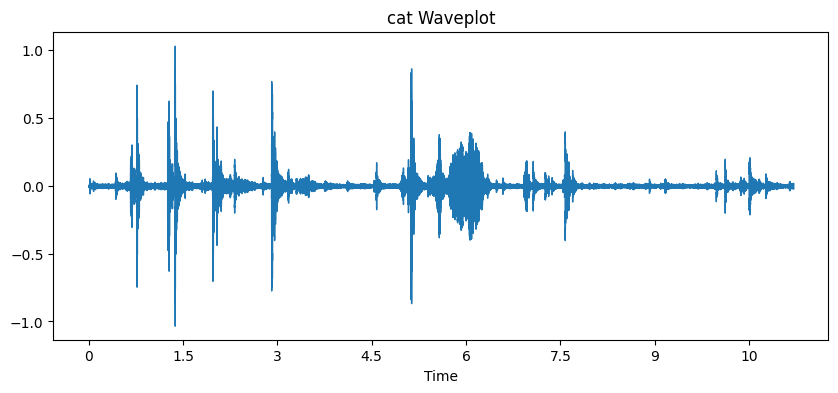

/var/folders/24/84w1gmkn1694m0d4j84bxwjr0000gn/T/ipykernel_18235/3490606793.py:11: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Sdb = librosa.amplitude_to_db(S)


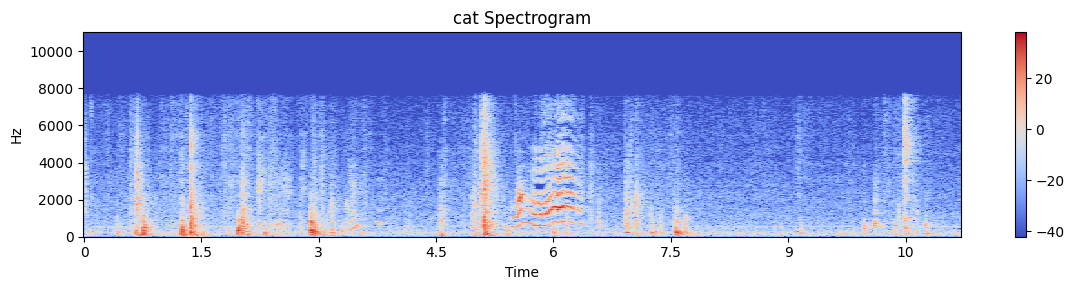

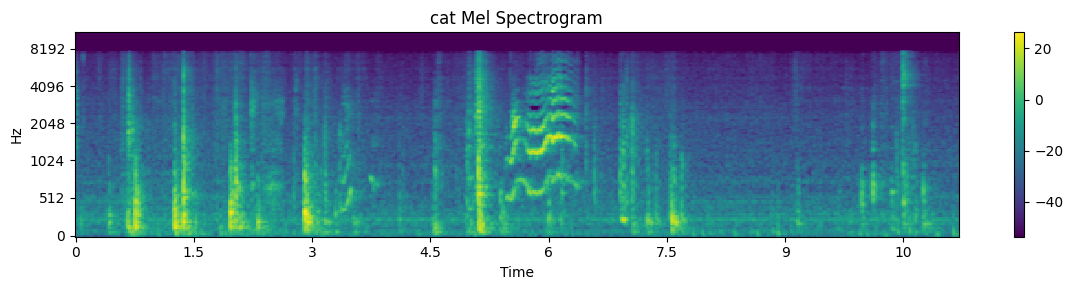

In [9]:
from IPython.display import Audio
import numpy as np
import librosa

# Example: setting label and path for a sound file
label = 'cat'
path = './cats_dogs/cat_1.wav'

# Load the audio data
data, sampling_rate = librosa.load(path)

# Plotting functions
waveplot_creation(data, sampling_rate, label)
spectrogram_creation(data, sampling_rate, label)
melspectrogram_creation(data, sampling_rate, label)

# Play the audio file
Audio(path)

# Data Augmentation

In [10]:
# noise injection
def noise(data):
    noise_ampl = 0.035 * np.random.uniform() * np.amax(data)
    # injecting gaussian noise to the data 
    data = data + noise_ampl * np.random.normal(size = data.shape[0])
    # data.shape - a tuple that tells us about the dimension the data - [0]th has the number of elements.
    # it is important to ensure that the size of the noise array is the same as the audio data to maintain synchronization
    return data # the noise injected data

# time stretching 
def stretch(data, rate=0.8):
    # Stretch or compress the audio data by the specified rate
    stretched_data = librosa.effects.time_stretch(data, rate)
    return stretched_data
    
# time shifting
def time_shift(data):
    shift_range = int(np.random.uniform(low=-5,high=5)*1000) # converting to millisec - audio processing unit
    return np.roll(data,shift_range)


def pitch(data , sr , n_steps = 0.7):
    # 70% lower pitch
    return librosa.effects.pitch_shift(data,sampling_rate,n_steps)

path = np.array(data_df.path)[1]
data , sampling_rate = librosa.load(path)

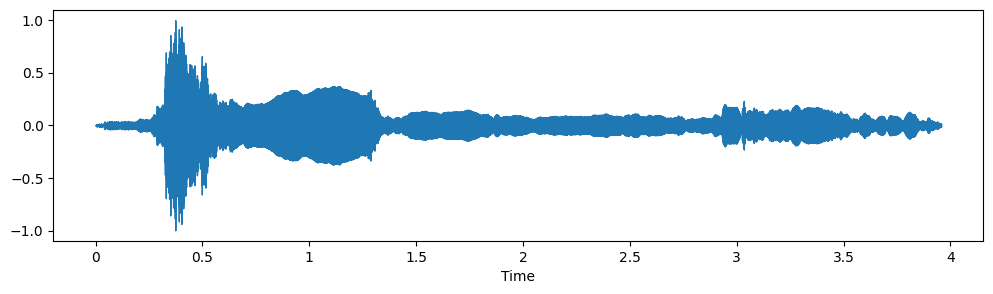

In [11]:
plt.figure(figsize = (12,3))
librosa.display.waveshow(y=data , sr = sampling_rate)

Audio(path)

### Noise Injection

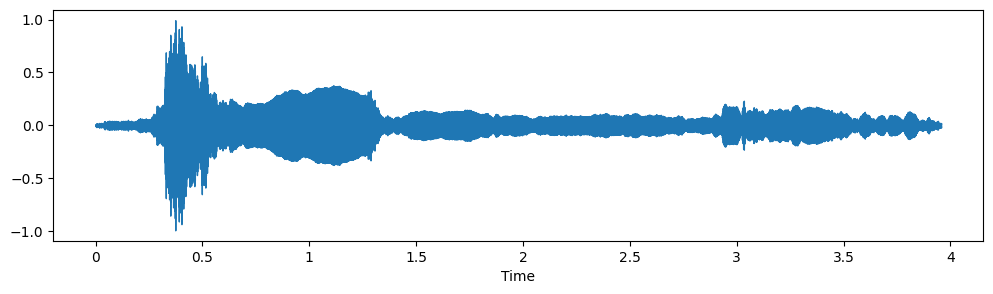

In [13]:
n = noise(data) # noise injected data
plt.figure(figsize=(12,3))
librosa.display.waveshow(y=n , sr = sampling_rate)
Audio(n , rate = sampling_rate)

### Time Stretching

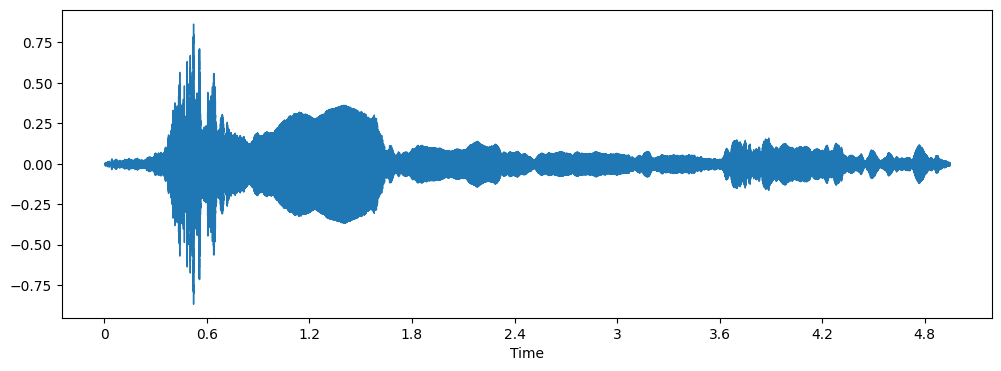

In [12]:
t_s = librosa.effects.time_stretch(data , rate = 0.8)


plt.figure(figsize=(12, 4))

librosa.display.waveshow(y=t_s, sr=sampling_rate)

Audio(t_s, rate=sampling_rate)

### Time Shifting

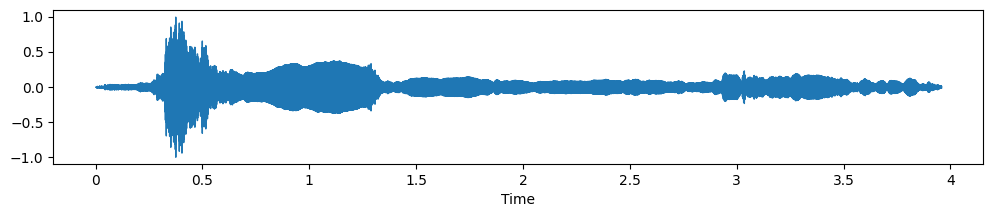

In [14]:
t_sh = time_shift(data)
plt.figure(figsize=(12,2))
librosa.display.waveshow(data , sr = sampling_rate)

Audio(t_sh , rate = sampling_rate)

# Feature extraction

In [16]:
import numpy as np
import librosa

def extract_features(data, sample_rate):
    result = np.array([])

    # Extract MFCC features
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))

    # Extract Mel Spectrogram features
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    
    return result

def get_features(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # Extract features from the original audio
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)
    
    # Extract features from noise-added audio (assumes `noise` function is defined)
    noise_data = noise(data)  # Define or replace `noise` function if necessary
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))
    
    # Extract features from time-stretched audio
    stretched_data = librosa.effects.time_stretch(data, rate=0.8)
    res3 = extract_features(stretched_data, sample_rate)
    result = np.vstack((result, res3))
    
    # Extract features from pitch-shifted audio
    stretched_pitch_data = librosa.effects.pitch_shift(y=data, sr=sample_rate, n_steps=0.7)
    res4 = extract_features(stretched_pitch_data, sample_rate)
    result = np.vstack((result, res4))
    
    return result

In [17]:

X, Y = [], []

print("Feature processing...")
for ind, (path, emotion) in enumerate(zip(data_df.path, data_df.label)):
    features = get_features(path)
    
    if ind % 100 == 0:
        print(f"{ind} samples have been processed...")
    
    for feature_vector in features:
        X.append(feature_vector)
        Y.append(label)

print(f"{len(data_df.path)} samples have been processed...")
print("Done.")

Feature processing...
0 samples have been processed...
100 samples have been processed...
200 samples have been processed...
277 samples have been processed...
Done.


In [18]:
len(X), len(Y) , data_df.path.shape

(1108, 1108, (277,))

In [19]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv' ,index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,labels
0,-270.809570,108.031731,-17.448404,57.968903,-25.652025,39.025131,-7.387650,21.119785,4.869023,14.235877,...,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,1.830500e-06,cat
1,-126.267726,19.716201,8.506433,15.137428,9.048048,9.044470,8.880928,6.922182,8.128506,7.091688,...,0.043721,0.043623,0.045308,0.042614,0.041267,0.041832,0.044899,0.045353,4.518921e-02,cat
2,-304.492706,102.224274,-13.530743,54.688866,-21.118797,36.295483,-4.506915,19.209389,6.527520,13.334163,...,0.000002,0.000002,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,1.146028e-06,cat
3,-301.347412,98.415787,-8.684635,52.955109,-20.417307,38.372299,-5.712891,23.448746,4.605303,15.379084,...,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000001,5.461700e-07,cat
4,-378.770477,98.367378,-28.350845,-25.805168,-20.780777,-20.433908,-12.554531,-3.395539,-6.127656,6.810581,...,0.000005,0.000005,0.000005,0.000005,0.000004,0.000004,0.000004,0.000004,4.082425e-06,cat


## Data Preparation

In [20]:
X = Features.iloc[: ,:-1].values 
Y = Features['labels'].values

## Splitting Data

In [21]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

Y

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [22]:
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size = 0.2, shuffle = True)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((886, 148), (886, 1), (222, 148), (222, 1))

In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((886, 148), (886, 1), (222, 148), (222, 1))

In [24]:
x_train = np.expand_dims(x_train , axis = 2)
x_test = np.expand_dims(x_test , axis = 2)
x_train.shape , y_train.shape , x_test.shape , y_test.shape


((886, 148, 1), (886, 1), (222, 148, 1), (222, 1))

## CNN Model

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

# Assuming x_train and x_test are already reshaped

model = Sequential()

# Input layer with BatchNormalization for improved stability
model.add(BatchNormalization(input_shape=(x_train.shape[1], 1)))

# Convolutional layer with more filters and kernel size
model.add(Conv1D(256, kernel_size=7, strides=1, padding='same', activation='relu'))

# Max pooling layer with a larger pool size
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

# Additional convolutional layer to capture more complex features
model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Dense layers with dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation for classification
model.add(Dense(Y.shape[1], activation='softmax'))

# Compile the model with an optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Bat  (None, 148, 1)            4         
 chNormalization)                                                
                                                                 
 conv1d_5 (Conv1D)           (None, 148, 256)          2048      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 74, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 74, 128)           163968    
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 37, 128)           0         
 g1D)                                                            
                                                      

In [37]:
history = model.fit(x_train , y_train , batch_size = 60 , epochs = 50 , validation_data =(x_test,y_test))

Epoch 1/50


/Users/marwanzahran/Library/Python/3.9/lib/python/site-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 1s 61ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
15/15 [==============================] - 1s 81ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - 1s 54ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 1s 56ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 1s 63ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 1s 59ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 1s 67ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.

# Evaluate Model

In [38]:
print("Accuracy of the model on the test data : " , model.evaluate(x_test,y_test)[1]*100,'%')

7/7 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Accuracy of the model on the test data :  100.0 %


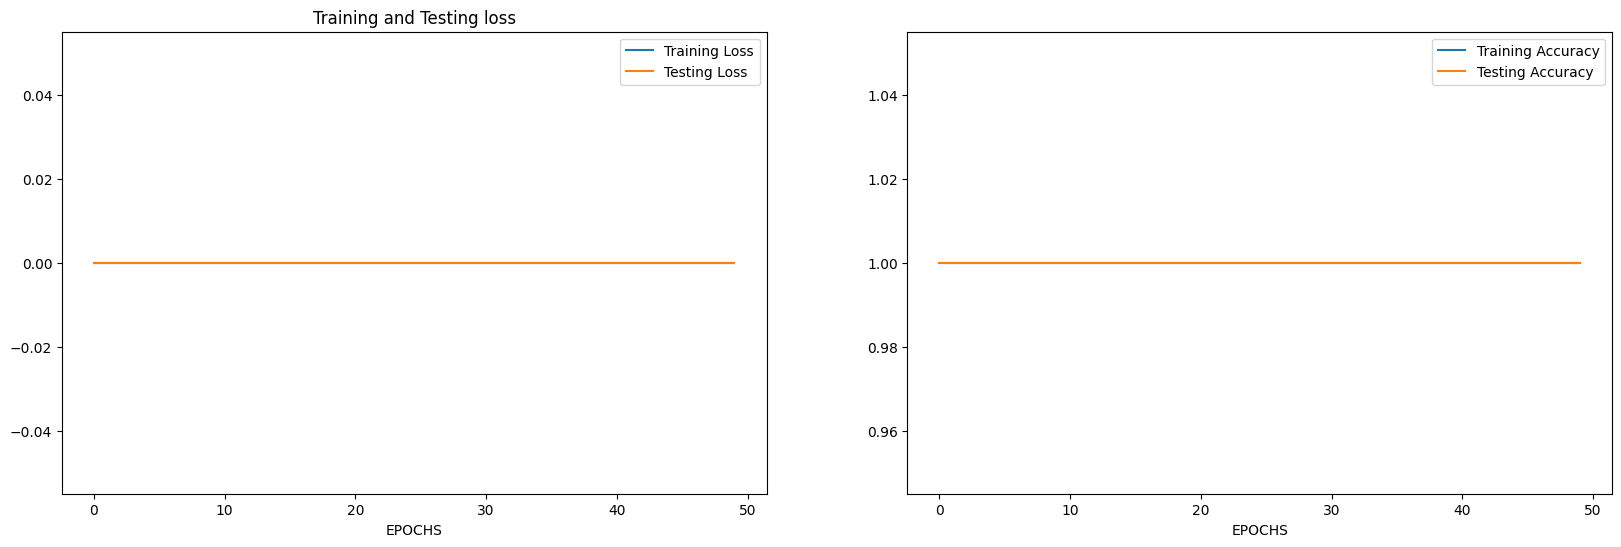

In [39]:
epochs = [i for i in range(50)] # as 50 epochs
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs, train_loss , label = 'Training Loss')
ax[0].plot(epochs, test_loss , label='Testing Loss')
ax[0].set_title('Training and Testing loss')
ax[0].legend()
ax[0].set_xlabel('EPOCHS')

ax[1].plot(epochs, train_acc , label='Training Accuracy')
ax[1].plot(epochs , test_acc , label ='Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel('EPOCHS')
plt.show()

In [47]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)


7/7 [==============================] - 0s 7ms/step


In [45]:
pred_df = pd.DataFrame(columns=['Predicted Labels' ,'Actual Labels'])

pred_df['Predicted Labels'] = y_pred.flatten()
pred_df['Actual Labels'] = y_test.flatten()
pred_df.head(40)

,Predicted Labels,Actual Labels
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


# Confusion Matrix
The confusion matrix provides a detailed breakdown of correct and incorrect predictions for each class.

* True Positives (TP): The model correctly predicted the positive class.
* True Negatives (TN): The model correctly predicted the negative class.
* False Positives (FP): The model incorrectly predicted the positive class.
* False Negatives (FN): The model incorrectly predicted the negative class.\
A well-performing model should have high values along the diagonal (TP and TN) and low values elsewhere (FP and FN).

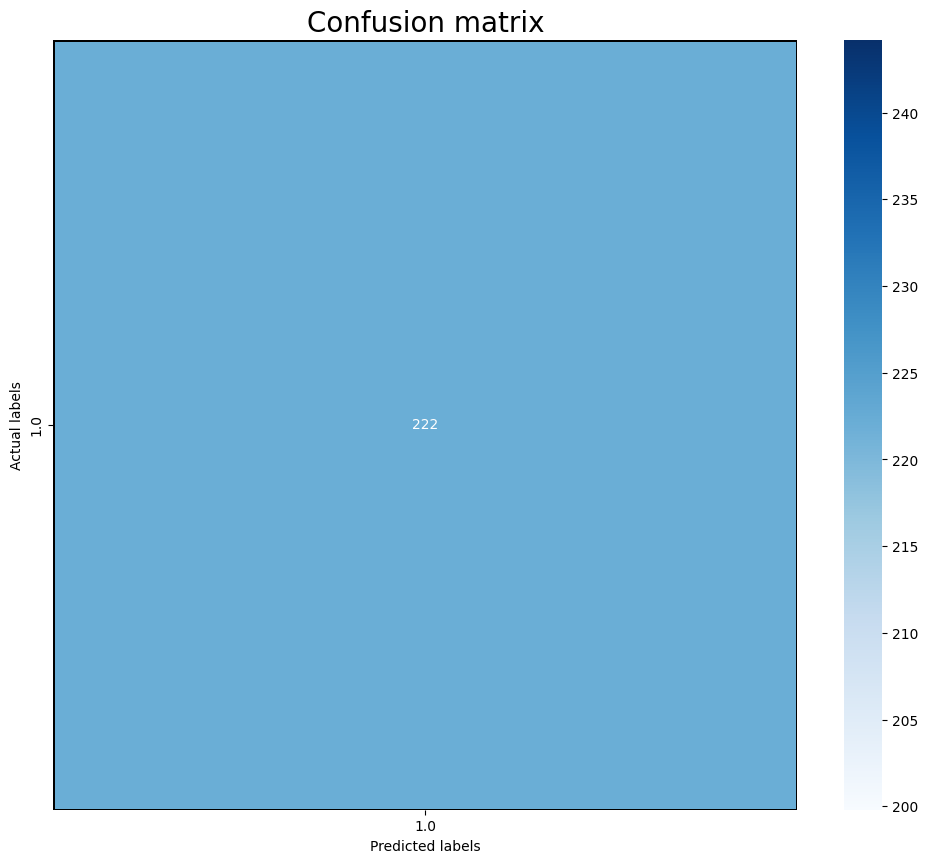

In [35]:
# Predict the values from the test set
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,10))
cm = pd.DataFrame(cm , index =[i for i in encoder.categories_] , columns =[i for i in encoder.categories_])
sns.heatmap(cm , linecolor='black', cmap ='Blues' , linewidth=1, annot=True ,fmt='')
plt.title('Confusion matrix' , size = 20)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()